In [65]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [66]:
def check_and_create_folder(folder_path, name_fold = "simu"):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        #return folder_path

    # Look for folders starting with "simu_"
    existing_folders = [name for name in os.listdir(folder_path) if name.startswith(f"{name_fold}_")]
    #print(f"{name}_")
    if not existing_folders:
        new_folder_name = f"{name_fold}_0001"
    else:
        # Sort the existing folders to find the highest numbered folder
        existing_folders.sort()
        last_folder_number = int(existing_folders[-1][len(name_fold)+1:])  # Extract the number from the folder name 
        #print(os.path.join(folder_path, existing_folders[-1]), len(os.listdir(os.path.join(folder_path, existing_folders[-1]))))   
        new_folder_number = last_folder_number  if  len(os.listdir(os.path.join(folder_path, existing_folders[-1]))) ==0 else last_folder_number +1
        #print(new_folder_number)
        new_folder_name = f"{name_fold}_{new_folder_number:04d}"

    new_folder_path = os.path.join(folder_path, new_folder_name)
    os.makedirs(new_folder_path, exist_ok=True)

    return new_folder_path

In [67]:
folder_path = check_and_create_folder("./dio_aiutami_mpc_simplified_imgs")

In [68]:
run_folder = "dio_please/simu_0005"

edge_infos = sorted([f for f in os.listdir(run_folder) if "edge_info" in f], key=lambda x: int(x.split('_')[0]))
vehicle_infos = sorted([f for f in os.listdir(run_folder) if "vehicle_info" in f], key=lambda x: int(x.split('_')[0]))
road_infos = sorted([f for f in os.listdir(run_folder) if "road_info" in f], key=lambda x: int(x.split('_')[0]))
requests_info = sorted([f for f in os.listdir(run_folder) if "requests_info" in f], key=lambda x: int(x.split('_')[0]))

In [69]:
road_infos_separated = sorted([f for f in road_infos if len(f.split("_")) == 3], key=lambda x: int(x.split('_')[0]))

In [70]:
road_infos_separated

['0000_road_info.csv',
 '0001_road_info.csv',
 '0002_road_info.csv',
 '0003_road_info.csv',
 '0004_road_info.csv',
 '0005_road_info.csv',
 '0006_road_info.csv',
 '0007_road_info.csv',
 '0008_road_info.csv',
 '0009_road_info.csv',
 '0010_road_info.csv',
 '0011_road_info.csv',
 '0012_road_info.csv',
 '0013_road_info.csv',
 '0014_road_info.csv',
 '0015_road_info.csv',
 '0016_road_info.csv',
 '0017_road_info.csv',
 '0018_road_info.csv',
 '0019_road_info.csv',
 '0020_road_info.csv',
 '0021_road_info.csv',
 '0022_road_info.csv',
 '0023_road_info.csv',
 '0024_road_info.csv',
 '0025_road_info.csv',
 '0026_road_info.csv',
 '0027_road_info.csv',
 '0028_road_info.csv',
 '0029_road_info.csv',
 '0030_road_info.csv',
 '0031_road_info.csv',
 '0032_road_info.csv',
 '0033_road_info.csv',
 '0034_road_info.csv',
 '0035_road_info.csv',
 '0036_road_info.csv',
 '0037_road_info.csv',
 '0038_road_info.csv',
 '0039_road_info.csv',
 '0040_road_info.csv',
 '0041_road_info.csv',
 '0042_road_info.csv',
 '0043_road

# Road Used

In [71]:
total_usage = {}    
average_usage = {}   

In [72]:
road_infos_dfs = {}
for i, r in enumerate(road_infos_separated):
    road_infos_dfs[i] = pd.read_csv(run_folder + "/" + r)
    average_use = 0
    for index, row in road_infos_dfs[i].iterrows():  # Iterate over rows of DataFrame
        edge = row["edge"]
        if i == 0:
            total_usage[edge] = row["use"]  # Store usage information based on edge value
            continue
        total_usage[edge] += row["use"]
        

In [73]:
total_usage

{'42432963-42432985': 0.0,
 '42432963-42432929': 0.0,
 '42432963-42434262': 0.0,
 '42430044-42430041': 28.0,
 '42430044-42432165': 2.0,
 '6223571524-3579432156': 0.0,
 '6223571524-6223571523': 0.0,
 '6223571524-6223571522': 0.0,
 '3786901738-42448693': 0.0,
 '3786901738-3786901743': 24.0,
 '3786901738-561042199': 0.0,
 '6177439750-42448317': 24.0,
 '6177439750-42455666': 0.0,
 '6177439750-6177439752': 0.0,
 '6177439750-42447020': 0.0,
 '3786901743-3786901738': 16.0,
 '3786901743-42458333': 64.0,
 '3786901743-561042190': 12.0,
 '3786901743-42445374': 64.0,
 '42430041.0-42430044': 25.0,
 '42430041.0-42429752': 1.0,
 '42430041.0-42427327': 32.0,
 '42430041.0-1918039897': 27.0,
 '42448317-6177439750': 16.0,
 '42448317-42432834': 64.0,
 '42448317-596775946': 12.0,
 '42448317-42447009': 64.0,
 '3579432156-6223571524': 0.0,
 '3579432156-1061531654': 0.0,
 '3579432156-42442569': 0.0,
 '3579432156-42428782': 0.0,
 '42432929-42432963': 0.0,
 '42432929-7732243558': 0.0,
 '42432929-42442584': 0.0,

Unique_roads

In [74]:
np.count_nonzero(list(total_usage.values()))

19

In [75]:
vehicle_infos_separated = sorted([f for f in road_infos if len(f.split("_")) > 3], key=lambda x: int(x.split('_')[0]))
carrying_vehicles_infos_separated = sorted([f for f in vehicle_infos_separated if len(f.split("_")) == 4], key=lambda x: int(x.split('_')[0]))
rebalancing_vehicles_infos_separated = sorted([f for f in vehicle_infos_separated if "rebalancing" in f], key=lambda x: int(x.split('_')[0]))

In [76]:
rebalancing_vehicles_infos_separated

['0000_vehicles_rebalancing_road_info.csv',
 '0001_vehicles_rebalancing_road_info.csv',
 '0002_vehicles_rebalancing_road_info.csv',
 '0003_vehicles_rebalancing_road_info.csv',
 '0004_vehicles_rebalancing_road_info.csv',
 '0005_vehicles_rebalancing_road_info.csv',
 '0006_vehicles_rebalancing_road_info.csv',
 '0007_vehicles_rebalancing_road_info.csv',
 '0008_vehicles_rebalancing_road_info.csv',
 '0009_vehicles_rebalancing_road_info.csv',
 '0010_vehicles_rebalancing_road_info.csv',
 '0011_vehicles_rebalancing_road_info.csv',
 '0012_vehicles_rebalancing_road_info.csv',
 '0013_vehicles_rebalancing_road_info.csv',
 '0014_vehicles_rebalancing_road_info.csv',
 '0015_vehicles_rebalancing_road_info.csv',
 '0016_vehicles_rebalancing_road_info.csv',
 '0017_vehicles_rebalancing_road_info.csv',
 '0018_vehicles_rebalancing_road_info.csv',
 '0019_vehicles_rebalancing_road_info.csv',
 '0020_vehicles_rebalancing_road_info.csv',
 '0021_vehicles_rebalancing_road_info.csv',
 '0022_vehicles_rebalancing_road

In [77]:
carrying_vehicle_usage = {}

In [78]:
carrying_vehicle_infos_dfs = {}
for i, r in enumerate(carrying_vehicles_infos_separated):
    carrying_vehicle_infos_dfs[i] = pd.read_csv(run_folder + "/" + r)
    for c in carrying_vehicle_infos_dfs[i].columns[2:]:
        if i ==0:
            carrying_vehicle_usage[c] = carrying_vehicle_infos_dfs[i][c].sum() 
            continue
        carrying_vehicle_usage[c] += carrying_vehicle_infos_dfs[i][c].sum()
        #



In [79]:
carrying_vehicle_usage

{'0': 0.0,
 '1': 0.0,
 '2': 0.0,
 '3': 0.0,
 '4': 9.0,
 '5': 10.0,
 '6': 40.0,
 '7': 13.0,
 '8': 0.0,
 '9': 0.0,
 '10': 0.0,
 '11': 0.0,
 '12': 44.0,
 '13': 45.0,
 '14': 44.0,
 '15': 44.0,
 '16': 43.0,
 '17': 46.0,
 '18': 41.0,
 '19': 41.0}

In [80]:
carrying_vehicle_infos_dfs.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [81]:

def get_usage_per_time(vehicle_usage_info, vehicle_infos_dfs_f):
    usage_per_time = {}
    for vehicle in vehicle_usage_info.keys():
        usage_per_time[vehicle] = []
        for k in vehicle_infos_dfs_f.keys():
                usage_per_time[vehicle] += [np.sum(vehicle_infos_dfs_f[k][vehicle])]
    return usage_per_time
        
#carrying_vehicle_infos_dfs

In [82]:
carrying_usage_per_time = get_usage_per_time(carrying_vehicle_usage, carrying_vehicle_infos_dfs)

In [83]:
carry_av_times = []
for vehicle in carrying_usage_per_time:
    t_average_time = sum(carrying_usage_per_time[vehicle])/15*100
    carry_av_times += [t_average_time]
    print(vehicle, t_average_time)

0 0.0
1 0.0
2 0.0
3 0.0
4 60.0
5 66.66666666666666
6 266.66666666666663
7 86.66666666666667
8 0.0
9 0.0
10 0.0
11 0.0
12 293.3333333333333
13 300.0
14 293.3333333333333
15 293.3333333333333
16 286.6666666666667
17 306.6666666666667
18 273.3333333333333
19 273.3333333333333


In [84]:
np.sum(carry_av_times)/len(carry_av_times)

140.00000000000003

In [85]:
np.count_nonzero(list(carrying_vehicle_usage.values()))

12

In [86]:
rebalancing_vehicle_usage = {}

In [87]:
rebalancing_vehicles_df = {}
for i, r in enumerate(rebalancing_vehicles_infos_separated):
    rebalancing_vehicles_df[i] = pd.read_csv(run_folder + "/" + r)
    for c in rebalancing_vehicles_df[i].columns[2:]:
        if i ==0:
            rebalancing_vehicle_usage[c] = rebalancing_vehicles_df[i][c].sum() 
            continue
        rebalancing_vehicle_usage[c] += rebalancing_vehicles_df[i][c].sum()
        #


In [88]:
np.count_nonzero(list(rebalancing_vehicle_usage.values()))

12

In [89]:
total_usage = {}

# Iterate over keys in rebalancing_vehicle_usage and update total_usage
for key, value in rebalancing_vehicle_usage.items():
    total_usage[key] = value

# Iterate over keys in carrying_vehicle_usage and update total_usage
for key, value in carrying_vehicle_usage.items():
    if key in total_usage:
        total_usage[key] += value
    else:
        total_usage[key] = value

In [90]:
np.count_nonzero(list(total_usage.values()))

12

In [91]:
rebalancing_usage_per_time = get_usage_per_time(rebalancing_vehicle_usage, rebalancing_vehicles_df)

In [92]:
reb_av_times = []
for vehicle in rebalancing_usage_per_time:
    t_average_time = sum(rebalancing_usage_per_time[vehicle])/15*100
    reb_av_times += [t_average_time]
    print(vehicle, t_average_time)

0 0.0
1 0.0
2 0.0
3 0.0
4 160.0
5 200.0
6 20.0
7 33.33333333333333
8 0.0
9 0.0
10 0.0
11 0.0
12 26.666666666666668
13 20.0
14 26.666666666666668
15 26.666666666666668
16 33.33333333333333
17 13.333333333333334
18 46.666666666666664
19 46.666666666666664


In [93]:
np.sum(reb_av_times)/len(reb_av_times)

32.666666666666664

# Unserved Requests

In [94]:
last_requests = pd.read_csv(run_folder+"/"+ requests_info[-1])

In [95]:
last_requests.head()

,Unnamed: 0,start,quantity
0,0,3.786902e+09,0.0
1,1,4.243004e+07,0.0
2,2,4.244832e+07,0.0
3,3,3.579432e+09,48.0
4,4,4.243293e+07,10.0


In [96]:
last_requests["quantity"].sum()

96.0

In [97]:
first_requests = pd.read_csv(run_folder+"/"+ requests_info[-1])

In [98]:
first_requests["quantity"].sum()

96.0

In [99]:
first_requests["id"].to_csv(run_folder.split("/")[0]+"/filter_reqs.csv")

KeyError: 'id'

# Road Usage Plot

In [ ]:
carrying_vehicle_infos_dfs = {}
for i, r in enumerate(carrying_vehicles_infos_separated):
    carrying_vehicle_infos_dfs[i] = pd.read_csv(run_folder + "/" + r)
    for c in carrying_vehicle_infos_dfs[i].columns[2:]:
        if i ==0:
            carrying_vehicle_usage[c] = carrying_vehicle_infos_dfs[i][c].sum() 
            continue
        carrying_vehicle_usage[c] += carrying_vehicle_infos_dfs[i][c].sum()
        #


In [ ]:
road_infos_dfs_road = {}
edge_usage = pd.DataFrame(columns=["edge", "usage"])
for i, r in enumerate(road_infos_separated):
    road_infos_dfs_road[i] = pd.read_csv(run_folder + "/" + r)
    if i ==0:
        edge_usage["edge"] = road_infos_dfs_road[i]["edge"]
        edge_usage["usage"] = road_infos_dfs_road[i]["use"]
        continue
    print(i)
    edge_usage["usage"] += road_infos_dfs_road[i]["use"]
    #average_use = 0
    #for index, row in road_infos_dfs[i].iterrows():  # Iterate over rows of DataFrame
    #    edge = row["edge"]
    #    if i == 0:
    #        total_usage[edge] = row["use"]  # Store usage information based on edge value
    #        continue
    #    total_usage[edge] += row["use"]
        

1
2
3
4
5
6
7
8
9


In [ ]:
road_infos_dfs_road[0].head()

,Unnamed: 0,edge,use
0,0,42459137-42429330,0.0
1,1,42459137-42436481,0.0
2,2,42459137-596776089,0.0
3,3,42435714-42435707,0.0
4,4,42435714-1825841704,0.0


In [ ]:
np.sum(edge_usage["usage"])

50.00000000755048

In [ ]:
edge_usage.to_csv("test2.csv")

In [ ]:

minima = min(edge_usage['usage'])
maxima = 10#max(road_df_total_use['usage'])
print(minima, max(edge_usage['usage']))
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Spectral_r)


0.0 12.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.999999999997193
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
12.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.556097540216689e-09
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

/var/folders/b6/t14lv28n5xqdhgq7zcrqwfkm0000gn/T/ipykernel_57723/1755984093.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm,label="Road Usage", orientation="vertical")


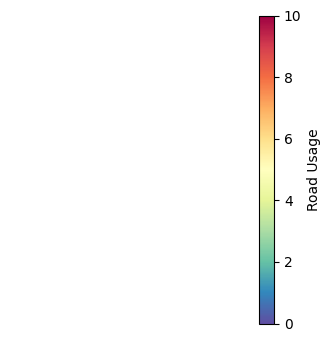

In [ ]:
import osmnx as ox
if True:
    graph = ox.graph_from_place("Manhattan, New York, USA", network_type="drive_service", custom_filter='["highway"~"primary|secondary"]')
    fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False,bgcolor='white', edge_color='black', figsize=(4, 4) )
    for edge, usage in zip(edge_usage['edge'],edge_usage['usage']):
        print(usage)
        node1, node2 = int(edge.split("-")[0]), int(edge.split("-")[1])
        #print(node1, node2)
        # Get node coordinates
        x1, y1 = graph.nodes[node1]['x'], graph.nodes[node1]['y']
        x2, y2 = graph.nodes[node2]['x'], graph.nodes[node2]['y']
        # Plot edge

        ax.scatter(x1, y1, color="black", s=2)
        ax.scatter(x2, y2, color="black", s=2)

        ax.plot([x1, x2], [y1, y2], color=mapper.to_rgba(usage), linewidth=4)  # You can adjust color and linewidth as needed





    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima) 
    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('Spectral_r'), norm =norm) 

    plt.colorbar(sm,label="Road Usage", orientation="vertical") 
    plt.savefig(f'{folder_path}/nyc_road_usage_test.png', dpi=60, bbox_inches='tight')

    #plt.show()
    ax.clear()

In [ ]:
import pickle
with open('graph_from_routes_simplified.pkl', 'rb') as f:
    graph_from_routes = pickle.load(f)

In [ ]:
import networkx as nx
shortest_path = nx.shortest_path(graph_from_routes, source=42430044, target=42430041, weight='length')

In [ ]:
shortest_path

[42430044, 42430041]

In [ ]:
ds = []
for a , d in graph_from_routes.nodes(data=True):
    if d["depot"] == True:
        ds+=[a]


In [ ]:
ds

[6177439750, 6223571524, 42430044, 3786901738, 42432963]

In [ ]:
def print_depots(node, ds = ds):
    for d in ds:
        shortest_path = nx.shortest_path(graph_from_routes, source=d, target=node, weight='length')
        print(d, shortest_path, len(shortest_path)>3)

In [ ]:
print_depots(42428297)

6177439750 [6177439750, 42448317, 42432834, 42456611, 596775919, 596775900, 42436701, 42445928, 42440153, 42430358, 42440001, 42432585, 42439990, 42428297] True
6223571524 [6223571524, 3579432156, 1061531654, 1061531807, 1061531593, 1061531603, 42428674, 42428653, 42428634, 9177424867, 42428595, 1061531707, 6173564360, 9170816531, 1061531509, 1825841742, 4347550065, 4347550071, 1825841693, 1825841743, 1825841704, 42435714, 42435707, 42435705, 42435684, 42432589, 42432585, 42439990, 42428297] True
42430044 [42430044, 42430041, 42429752, 1918039864, 42437612, 42445511, 42448693, 4597668041, 561042190, 42445365, 42445908, 42452973, 42430311, 42430314, 42430333, 42437363, 42428297] True
3786901738 [3786901738, 3786901743, 561042190, 42445365, 42445908, 42452973, 42430311, 42430314, 42430333, 42437363, 42428297] True
42432963 [42432963, 42434262, 561035361, 561035343, 9515699765, 6223571522, 6223571524, 3579432156, 1061531654, 1061531807, 1061531593, 1061531603, 42428674, 42428653, 42428634

# Analysis on graph going

In [411]:
folder_for_graph_name = "analysis_on_simplified_graph"
folders_for_graph = sorted(os.listdir(folder_for_graph_name), key=lambda x: int(x.split('_')[1]))

In [412]:
folders_for_graph

['simu_0001',
 'simu_0002',
 'simu_0003',
 'simu_0004',
 'simu_0005',
 'simu_0006',
 'simu_0007']

In [413]:
def get_df_for_graph(folder_for_graph_name, folders_for_graph):
    road_simu_names = {}
    req_simu_names = {}
    road_simu_cvs = {}
    req_simu_csv = {}
    for i, foldern_name in enumerate(folders_for_graph):
        simul_file_name = folder_for_graph_name+"/"+foldern_name
        simu_files_names = sorted([f for f in os.listdir(simul_file_name) if ".txt" not in f  and len(f.split("_")) ==3], key=lambda x: int(x.split('_')[0]))
        road_names = [f for f in simu_files_names if "requests" not in f]
        requests_names = [f for f in simu_files_names if "road" not in f]
        road_simu_names[i] = road_names
        req_simu_names[i] = requests_names
        road_simu_cvs[i+1] = pd.DataFrame(columns=["edge"]+[f"simu_{f.split('_')[0]}" for f in road_names ])
        for ii, road_name in enumerate(road_names):
            temp = pd.read_csv(simul_file_name + "/" + road_name)
            if ii==0:
                road_simu_cvs[i+1]["edge"] = temp["edge"]
            
            road_simu_cvs[i+1][f"simu_{road_name.split('_')[0]}"] = temp["use"]
        req_simu_csv[i+1] = pd.DataFrame(columns=["start"]+[f"simu_{f.split('_')[0]}" for f in requests_names ])
        for ii, requ_name in enumerate(requests_names):
            temp = pd.read_csv(simul_file_name + "/" + requ_name)
            if ii==0:
                req_simu_csv[i+1]["start"] = temp["start"]
            
            req_simu_csv[i+1][f"simu_{requ_name.split('_')[0]}"] = temp["quantity"]

    return road_simu_names, req_simu_names, road_simu_cvs,req_simu_csv



In [414]:
road_simu_names, req_simu_names, road_simu_cvs,req_simu_csv = get_df_for_graph(folder_for_graph_name, folders_for_graph)

In [415]:
road_simu_cvs.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7])

In [416]:
def plot_usage_per_simu(df_package, road = True, plot = True, legend = None):
    x_y_by_simu = {}
    for k in df_package:
        simu_amount = len(df_package[k].columns)-1 #if road else len(df_package[k].columns)
        x = list(range(simu_amount))
        
        y = [
            np.sum(df_package[k][f"simu_{t:04d}"]) for t in x
        ]
        y += [0] if road else []
        x += [simu_amount] if road else []
        x_y_by_simu[k] = (x,y)
    

    if not plot:
        for x, y in x_y_by_simu.values():
            print(" ".join([f"({xx}, {int(yy)})" for xx, yy in zip(x, y)]))
        return x_y_by_simu
    
    fig, ax = plt.subplots()
    for x, y in x_y_by_simu.values():
        ax.plot(x, y)
    ax.set_title('A single plot')
    if legend == None:
        legend = x_y_by_simu.keys()
                
    
    ax.legend(legend)
    ax.set_xticks(x_y_by_simu[1][0])


In [417]:
legend = [f"r=3, km = {30*t}" for t in range(1,len(road_simu_cvs.keys())+1) if t <5]
legend += [f"r=2, km = {30*t}" for t in range(1,len(road_simu_cvs.keys())+1) if t >=5]

In [418]:
legend

['r=3, km = 30',
 'r=3, km = 60',
 'r=3, km = 90',
 'r=3, km = 120',
 'r=2, km = 150',
 'r=2, km = 180',
 'r=2, km = 210']

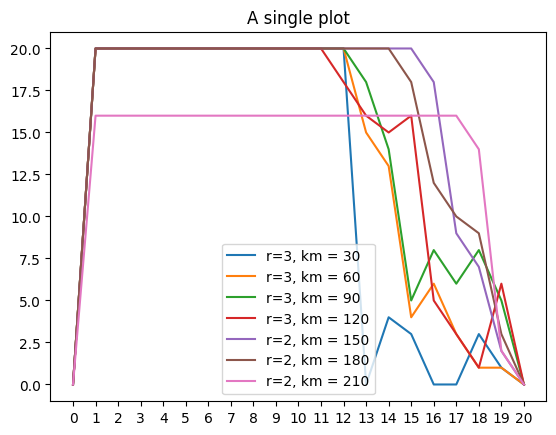

In [419]:
plot_usage_per_simu(road_simu_cvs, legend=legend)

In [420]:
_ = plot_usage_per_simu(road_simu_cvs, legend=legend, plot=False)

(0, 0) (1, 20) (2, 20) (3, 20) (4, 20) (5, 20) (6, 20) (7, 20) (8, 20) (9, 20) (10, 20) (11, 20) (12, 20) (13, 0) (14, 4) (15, 3) (16, 0) (17, 0) (18, 3) (19, 1) (20, 0)
(0, 0) (1, 20) (2, 20) (3, 20) (4, 20) (5, 20) (6, 20) (7, 20) (8, 20) (9, 20) (10, 20) (11, 20) (12, 20) (13, 15) (14, 13) (15, 4) (16, 6) (17, 3) (18, 1) (19, 1) (20, 0)
(0, 0) (1, 20) (2, 20) (3, 20) (4, 20) (5, 20) (6, 20) (7, 20) (8, 20) (9, 20) (10, 20) (11, 20) (12, 20) (13, 18) (14, 14) (15, 5) (16, 8) (17, 6) (18, 8) (19, 5) (20, 0)
(0, 0) (1, 20) (2, 20) (3, 20) (4, 20) (5, 20) (6, 20) (7, 20) (8, 20) (9, 20) (10, 20) (11, 20) (12, 18) (13, 16) (14, 15) (15, 16) (16, 5) (17, 3) (18, 1) (19, 6) (20, 0)
(0, 0) (1, 20) (2, 20) (3, 20) (4, 20) (5, 20) (6, 20) (7, 20) (8, 20) (9, 20) (10, 20) (11, 20) (12, 20) (13, 20) (14, 20) (15, 20) (16, 18) (17, 9) (18, 7) (19, 2) (20, 0)
(0, 0) (1, 20) (2, 20) (3, 20) (4, 20) (5, 20) (6, 20) (7, 20) (8, 20) (9, 20) (10, 20) (11, 20) (12, 20) (13, 20) (14, 20) (15, 18) (16, 1

In [421]:
req_simu_csv[1]

,start,simu_0000,simu_0001,simu_0002,simu_0003,simu_0004,simu_0005,simu_0006,simu_0007,simu_0008,...,simu_0011,simu_0012,simu_0013,simu_0014,simu_0015,simu_0016,simu_0017,simu_0018,simu_0019,simu_0020
0,3.786902e+09,48.0,48.0,48.0,40.0,40.0,32.0,32.0,24.0,24.0,...,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.243004e+07,48.0,48.0,48.0,40.0,40.0,32.0,32.0,24.0,24.0,...,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.244832e+07,48.0,48.0,48.0,40.0,40.0,32.0,32.0,24.0,24.0,...,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.579432e+09,48.0,48.0,48.0,40.0,40.0,32.0,32.0,24.0,24.0,...,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.243293e+07,10.0,10.0,10.0,6.0,6.0,4.0,4.0,2.0,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.243426e+07,38.0,38.0,38.0,34.0,34.0,28.0,28.0,22.0,22.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [422]:
_ = plot_usage_per_simu(req_simu_csv, legend=legend, plot=False, road=False)

(0, 240) (1, 240) (2, 240) (3, 200) (4, 200) (5, 160) (6, 160) (7, 120) (8, 120) (9, 80) (10, 80) (11, 40) (12, 40) (13, 0) (14, 0) (15, 0) (16, 0) (17, 0) (18, 0) (19, 0) (20, 0)
(0, 240) (1, 240) (2, 240) (3, 232) (4, 224) (5, 192) (6, 184) (7, 152) (8, 144) (9, 112) (10, 104) (11, 72) (12, 64) (13, 32) (14, 24) (15, 2) (16, 2) (17, 0) (18, 0) (19, 0) (20, 0)
(0, 240) (1, 240) (2, 240) (3, 232) (4, 224) (5, 192) (6, 184) (7, 152) (8, 144) (9, 112) (10, 104) (11, 72) (12, 64) (13, 32) (14, 24) (15, 2) (16, 2) (17, 0) (18, 0) (19, 0) (20, 0)
(0, 240) (1, 240) (2, 240) (3, 232) (4, 230) (5, 228) (6, 190) (7, 180) (8, 142) (9, 138) (10, 100) (11, 98) (12, 60) (13, 60) (14, 32) (15, 30) (16, 4) (17, 2) (18, 0) (19, 0) (20, 0)
(0, 240) (1, 240) (2, 240) (3, 224) (4, 224) (5, 214) (6, 214) (7, 190) (8, 188) (9, 156) (10, 150) (11, 116) (12, 110) (13, 78) (14, 74) (15, 46) (16, 42) (17, 14) (18, 10) (19, 0) (20, 0)
(0, 240) (1, 240) (2, 232) (3, 228) (4, 224) (5, 212) (6, 200) (7, 194) (8, 1

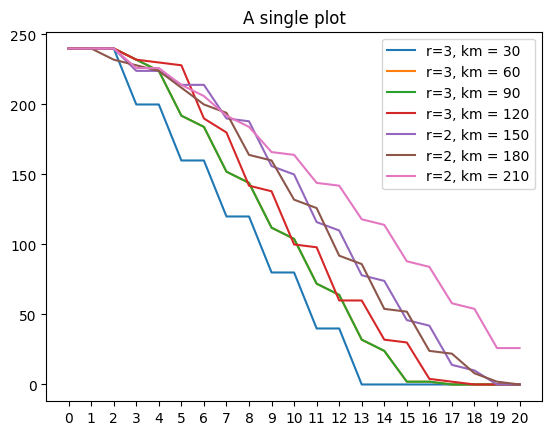

In [423]:
_ = plot_usage_per_simu(req_simu_csv, legend=legend, plot=True, road=False)